# Seattle AirBnB Data Analysis

In [63]:
# Import libraries for analysis
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

In [64]:
pd.set_option("display.max_columns", 100)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)

## Data Gathering

In [65]:
# Read in datasets
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

## Data Assessment

In [66]:
# Look at each dataset to get a feel of the data
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [67]:
calendar.sample(10)

,listing_id,date,available,price
198968,7917700,2016-02-16,t,$99.00
1313507,3041619,2016-08-28,f,NaN
214860,2966415,2016-08-31,t,$55.00
321126,9909445,2016-10-21,f,NaN
982992,796594,2016-02-20,t,$249.00
914554,9067268,2016-08-20,f,NaN
903991,6612940,2016-09-11,f,NaN
888721,10104370,2016-11-10,f,NaN
289277,6249536,2016-07-19,t,$98.00
595245,284087,2016-10-25,t,$175.00


In [68]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [69]:
calendar.shape

(1393570, 4)

In [70]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [71]:
listings.sample(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2627,2488228,https://www.airbnb.com/rooms/2488228,20160104002432,2016-01-04,Suite in Capitol Hill Townhouse,"This is a private, spacious suite in a beautif...",This guest suite is truly an oasis in the cent...,"This is a private, spacious suite in a beautif...",none,"Capitol Hill is a hip, vibrant, upscale urban ...",Price includes Washington State & Seattle sale...,There are at least six bus routes only a few b...,https://a1.muscache.com/ac/pictures/45881719/e...,https://a1.muscache.com/im/pictures/45881719/e...,https://a1.muscache.com/ac/pictures/45881719/e...,https://a1.muscache.com/ac/pictures/45881719/e...,12736784,https://www.airbnb.com/users/show/12736784,John,2014-03-02,"Seattle, Washington, United States",I'm a quiet and considerate airbnb host & gues...,within an hour,100%,100%,t,https://a0.muscache.com/ac/users/12736784/prof...,https://a0.muscache.com/ac/users/12736784/prof...,Capitol Hill,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"East Harrison Street, Seattle, WA 98102, Unite...",Capitol Hill,Broadway,Capitol Hill,Seattle,WA,98102,Seattle,"Seattle, WA",US,United States,47.620875,-122.318054,t,House,Private room,2,1.5,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",Heating,Washer,D...",NaN,$69.00,NaN,NaN,$300.00,$25.00,1,$5.00,2,28,today,t,14,27,43,43,2016-01-04,104,2014-07-07,2015-12-23,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,5.70
984,8049470,https://www.airbnb.com/rooms/8049470,20160104002432,2016-01-04,Lake Washington view on Bus 27 line,"Cozy and clean 2nd bedroom with a dbl bed, dre...",Smaller bedroom in a 2-bedroom apartment. Furn...,"Cozy and clean 2nd bedroom with a dbl bed, dre...",none,"We are close to MANY neighborhoods, including ...",My dog is very protective (great watchdog!) an...,"Street parking and EASY access to the 3, 4, 8,...",https://a1.muscache.com/ac/pictures/102588588/...,https://a1.muscache.com/im/pictures/102588588/...,https://a1.muscache.com/ac/pictures/102588588/...,https://a1.muscache.com/ac/pictures/102588588/...,42509172,https://www.airbnb.com/users/show/42509172,Kelly,2015-08-25,"Seattle, Washington, United States","Theater fan, work-at-home marketing profession...",within an hour,100%,100%,f,https://a1.muscache.com/ac/users/42509172/prof...,https://a1.muscache.com/ac/users/42509172/prof...,Leschi,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"29th Avenue, Seattle, WA 98122, United States",Leschi,Leschi,Central Area,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,47.602974,-122.293420,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,"

In [72]:
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [73]:
listings.shape

(3818, 92)

In [74]:
# Verify the same number of listing ids
calendar.shape[0]/365

3818.0

In [75]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [76]:
reviews.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
67379,338091,1322567,2012-05-21,978117,Scott,Judy's place was beautiful and in a great loca...
27889,397117,15561362,2014-07-11,3741776,Jacob,Lauren was great! Showed us around and was fu...
83642,4278896,34242626,2015-06-06,19927125,Lisa,Allison was a great host. Her apartment is cle...
39228,4218733,50208829,2015-10-10,43028383,Xiaochen,"Henry is a great host, although we don't have ..."
68486,1651324,46722829,2015-09-13,35099197,Katie,We had a great time in Seattle staying in the ...


In [77]:
reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [78]:
reviews.shape

(84849, 6)

## Business Understanding

what are the questions you are interested in tackling.
1. What is the monthly average price/night for the city?
2. What is the monthly occupancy ratio for the city?
3. What is the monthly average price/night per neighbourhood?
4. What is the monthly occupancy ratio per neighbourhood? 
5. What is the average price Monday to Sunday?

What are we asking - is the price set correctly to maximize return?


## Data Wrangling

In [79]:
# Missing values in any rows or columns
print(calendar.isnull().any())
print()
print(listings.isnull().any())
print()
print(reviews.isnull().any())

listing_id    False
date          False
available     False
price          True
dtype: bool

id                                  False
listing_url                         False
scrape_id                           False
last_scraped                        False
name                                False
summary                              True
space                                True
description                         False
experiences_offered                 False
neighborhood_overview                True
notes                                True
transit                              True
thumbnail_url                        True
medium_url                           True
picture_url                         False
xl_picture_url                       True
host_id                             False
host_url                            False
host_name                            True
host_since                           True
host_location                        True
host_about               

In [ ]:
# Check datatypes and convert

In [80]:
# Convert price into float
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [81]:
# Convert Nan prices into 0 price
calendar['price'].fillna(0, inplace=True)
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,0.0
3,241032,2016-01-07,f,0.0
4,241032,2016-01-08,f,0.0


In [82]:
# Convert column 'available' to a true boolean
calendar['available'] = calendar['available'] == 't'

In [83]:
calendar['available'].value_counts()

True     934542
False    459028
Name: available, dtype: int64

In [19]:
#calendar['date'].value_counts()

In [84]:
calendar['date'].min()

'2016-01-04'

In [85]:
calendar['date'].max()

'2017-01-02'

In [86]:
# Convert column 'date' to a true datetype
calendar['date'] = pd.to_datetime(calendar['date'])

In [87]:
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available               bool
price                float64
dtype: object

## Exploratory Data Analysis

In [ ]:
# Build exploratory plots ie bar charts, histograms, scatterplots

In [170]:
df = calendar.groupby('listing_id')

In [171]:
df.mean()

,available,price
listing_id,,
3335,0.846575,101.589041
4291,1.000000,82.000000
5682,0.846575,45.668493
6606,1.000000,92.849315
7369,0.145205,12.342466
9419,1.000000,85.616438
9460,0.156164,17.761644
9531,0.493151,83.589041
9534,0.717808,89.726027


In [172]:
# Total occupancy ratio for the year
round(calendar['available'].mean()*100,1)

67.1

In [173]:
# Total revenue for all rooms for the year
calendar['price'].sum()

128915264.0

In [174]:
calendar['price'].describe()

count    1.393570e+06
mean     9.250720e+01
std      1.077295e+02
min      0.000000e+00
25%      0.000000e+00
50%      7.500000e+01
75%      1.300000e+02
max      1.650000e+03
Name: price, dtype: float64

In [175]:
calendar.shape[0]/365

3818.0

In [176]:
avg_annual_revenue = round(calendar['price'].sum()/ (calendar.shape[0]/365),0)
avg_annual_revenue

33765.0

In [177]:
list = listings[['id','neighbourhood_group_cleansed']]
list.head()

,id,neighbourhood_group_cleansed
0,241032,Queen Anne
1,953595,Queen Anne
2,3308979,Queen Anne
3,7421966,Queen Anne
4,278830,Queen Anne


In [178]:
list['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [179]:
list = list.rename(index=str, columns={"id": "listing_id", "neighbourhood_group_cleansed":"neighbourhood"})
list.head()

,listing_id,neighbourhood
0,241032,Queen Anne
1,953595,Queen Anne
2,3308979,Queen Anne
3,7421966,Queen Anne
4,278830,Queen Anne


In [180]:
new_df = pd.merge(calendar, list, on=['listing_id', 'listing_id'])

In [181]:
new_df.dtypes

listing_id                int64
date             datetime64[ns]
available                  bool
price                   float64
neighbourhood            object
dtype: object

In [277]:
new_df['neighbourhood'] = new_df['neighbourhood'].astype('category')
new_df['date'] = pd.to_datetime(new_df['date'])
new_df['neighbourhood'] = new_df['neighbourhood'].replace('Other neighborhoods','Other')

In [278]:
new_df.head()

,listing_id,date,available,price,neighbourhood
0,241032,2016-01-04,True,85.0,Queen Anne
1,241032,2016-01-05,True,85.0,Queen Anne
2,241032,2016-01-06,False,0.0,Queen Anne
3,241032,2016-01-07,False,0.0,Queen Anne
4,241032,2016-01-08,False,0.0,Queen Anne


In [184]:
month_list=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
week_list=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [186]:
# Monthly average price per night
avg_price_per_night = new_df.groupby(new_df['date'].dt.strftime('%m'))['price'].mean()
avg_price_per_night = pd.DataFrame(avg_price_per_night).reset_index()
avg_price_per_night['date'] = avg_price_per_night.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], month_list)
avg_price_per_night

,date,price
0,Jan,69.683499
1,Feb,82.308439
2,Mar,91.233047
3,Apr,89.683700
4,May,94.281823
5,Jun,99.453597
6,Jul,95.377854
7,Aug,97.181255
8,Sep,96.612092
9,Oct,95.444659


In [187]:
# Monthly occupancy rates
occ_ratio_per_month = round(new_df.groupby(new_df['date'].dt.strftime('%m'))['available'].mean()*100,1)
occ_ratio_per_month = pd.DataFrame(occ_ratio_per_month).reset_index()
occ_ratio_per_month['date'] = occ_ratio_per_month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], month_list)
occ_ratio_per_month

,date,available
0,Jan,56.7
1,Feb,66.2
2,Mar,70.9
3,Apr,66.4
4,May,67.6
5,Jun,67.4
6,Jul,62.7
7,Aug,64.5
8,Sep,67.4
9,Oct,69.7


In [193]:
# Weekly average price per night
week = new_df.groupby(new_df['date'].dt.strftime('%w'))['price'].mean()
week = pd.DataFrame(week).reset_index()
week['date'] = week['date'].replace(['0','1','2','3','4','5','6'], week_list)
week

,date,price
0,Mon,91.837727
1,Tue,91.052596
2,Wed,90.988420
3,Thu,90.992873
4,Fri,91.403801
5,Sat,95.678612
6,Sun,95.624370


In [238]:
weekly = round(new_df.groupby(new_df['date'].dt.strftime('%W'))['price'].mean(),2)
weekly = pd.DataFrame(weekly).reset_index()
weekly.columns=['week_number','price']
weekly['week_number'] = weekly['week_number'].astype(int)
weekly

,week_number,price
0,0,105.71
1,1,63.97
2,2,65.55
3,3,72.11
4,4,72.77
5,5,77.89
6,6,82.04
7,7,84.14
8,8,84.81
9,9,88.70


In [279]:
# Average price per night by neighbourhood
new_df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

neighbourhood
Magnolia               153.922300
Downtown               121.756030
Queen Anne             109.267509
West Seattle           103.876024
Interbay               100.104857
Central Area            90.689617
Cascade                 88.749854
Ballard                 87.159333
Capitol Hill            86.331091
Other                   84.378410
University District     77.945767
Seward Park             75.556413
Lake City               72.665876
Beacon Hill             70.750964
Delridge                67.938998
Northgate               67.547226
Rainier Valley          67.122995
Name: price, dtype: float64

In [280]:
hood_avg_price_per_month = round(new_df.groupby('neighbourhood')['price'].mean(),2)
hood_avg_price_per_month = pd.DataFrame(hood_avg_price_per_month).reset_index()
hood_avg_price_per_month

,neighbourhood,price
0,Ballard,87.16
1,Beacon Hill,70.75
2,Capitol Hill,86.33
3,Cascade,88.75
4,Central Area,90.69
5,Delridge,67.94
6,Downtown,121.76
7,Interbay,100.10
8,Lake City,72.67
9,Magnolia,153.92


In [287]:
hood_occ = round(new_df.groupby('neighbourhood')['available'].mean()*100,1)
hood_occ = pd.DataFrame(hood_occ).reset_index()
hood_occ

,neighbourhood,available
0,Ballard,69.2
1,Beacon Hill,70.3
2,Capitol Hill,64.1
3,Cascade,57.6
4,Central Area,67.2
5,Delridge,74.7
6,Downtown,65.0
7,Interbay,84.5
8,Lake City,76.9
9,Magnolia,77.5


In [296]:
# Price per night per month per neighbourhood
hood_price_month = round(new_df.groupby(['neighbourhood',new_df['date'].dt.strftime('%m')])['price'].mean(),2)
hood_price_month = pd.DataFrame(hood_price_month).reset_index()
hood_price_month

,neighbourhood,date,price
0,Ballard,01,58.09
1,Ballard,02,67.52
2,Ballard,03,77.33
3,Ballard,04,80.89
4,Ballard,05,86.17
5,Ballard,06,98.79
6,Ballard,07,92.31
7,Ballard,08,97.39
8,Ballard,09,94.70
9,Ballard,10,94.08


In [175]:
new_df['date'] = pd.to_datetime(new_df['date'])

In [178]:
new_df.groupby(new_df['date'].dt.strftime('%B'))['price'].sum()

date
April        10272371.0
August       11502179.0
December     11949282.0
February      9113355.0
January       7981548.0
July         11288732.0
June         11391415.0
March        10798161.0
May          11159008.0
November     11096625.0
October      11296639.0
September    11065949.0
Name: price, dtype: float64

In [61]:
calendar['price'][calendar['listing_id'] == 241032].value_counts()

85.0    346
0.0      19
Name: price, dtype: int64

In [68]:
listings['cleaning_fee'][listings['id']==241032]

0    NaN
Name: cleaning_fee, dtype: object

In [70]:
listings['review_scores_value'][reviews['id']==241032].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: review_scores_value, dtype: float64

In [39]:
column_list = listings.columns.values
column_list

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

In [97]:
listings['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [104]:
listings.groupby('neighbourhood_group_cleansed')['review_scores_rating'].mean().sort_values(ascending=False)

neighbourhood_group_cleansed
Central Area           96.009404
West Seattle           95.864198
Delridge               95.861538
Ballard                95.533679
Queen Anne             95.443089
Seward Park            95.025641
Rainier Valley         94.731343
Northgate              94.692308
Other neighborhoods    94.562500
Lake City              94.375000
Capitol Hill           94.184783
Beacon Hill            94.019417
Downtown               93.958333
Magnolia               93.787234
Interbay               93.777778
Cascade                92.461538
University District    88.437500
Name: review_scores_rating, dtype: float64

In [101]:
listings.groupby('neighbourhood_group_cleansed')['review_scores_rating'].mean().sort_values(ascending=False)

neighbourhood_group_cleansed
Central Area           96.009404
West Seattle           95.864198
Delridge               95.861538
Ballard                95.533679
Queen Anne             95.443089
Seward Park            95.025641
Rainier Valley         94.731343
Northgate              94.692308
Other neighborhoods    94.562500
Lake City              94.375000
Capitol Hill           94.184783
Beacon Hill            94.019417
Downtown               93.958333
Magnolia               93.787234
Interbay               93.777778
Cascade                92.461538
University District    88.437500
Name: review_scores_rating, dtype: float64

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Data Modeling

## Explanatory Visualizations

In [228]:
current_palette = sns.color_palette("muted")

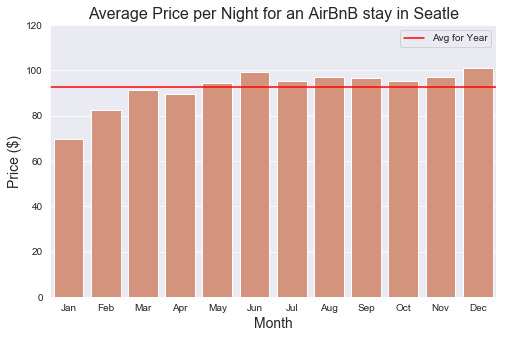

In [154]:
f, ax = plt.subplots(figsize=(8,5))
sns.set_style("darkgrid")
sns.barplot(x="date",y="price",data=avg_price_per_night,color="coral", saturation=.5,)
plt.title("Average Price per Night for an AirBnB stay in Seatle",fontsize=16)
plt.xlabel("Month",fontsize=14)
plt.ylabel("Price ($)",fontsize=14)
plt.ylim(0,120)
plt.axhline(calendar['price'].mean(),color='r',label='Avg for Year')
ax.legend();


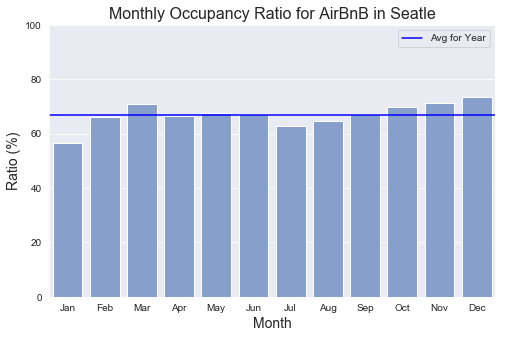

In [164]:
f, ax = plt.subplots(figsize=(8,5))
sns.set_style("darkgrid")
sns.barplot(x="date",y="available",data=occ_ratio_per_month,color="cornflowerblue", saturation=.5,)
plt.title("Monthly Occupancy Ratio for AirBnB in Seatle",fontsize=16)
plt.xlabel("Month",fontsize=14)
plt.ylabel("Ratio (%)",fontsize=14)
plt.ylim(0,100)
plt.axhline(calendar['available'].mean()*100,color='b',label='Avg for Year')
ax.legend();

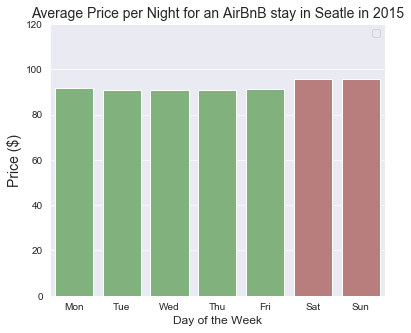

In [258]:
week["weekend"] = week["date"].isin(["Sat", "Sun"])

f, ax = plt.subplots(figsize=(6,5))
sns.set_style("darkgrid")
sns.barplot(x="date",y="price",hue='weekend',data=week,dodge=False,
            palette=current_palette[2:4],saturation=0.5)
plt.title("Average Price per Night for an AirBnB stay in Seatle in 2015",fontsize=14)
plt.xlabel("Day of the Week",fontsize=12)
plt.ylabel("Price ($)",fontsize=14)
ax.legend('')
plt.ylim(0,120);

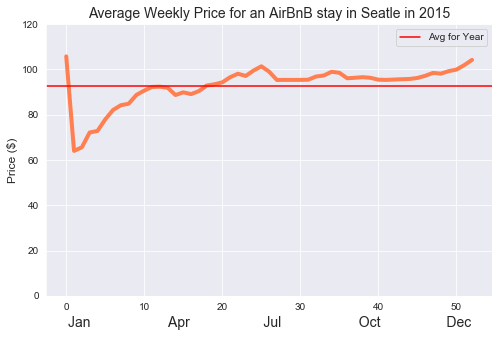

In [257]:
f, ax = plt.subplots(figsize=(8,5))
sns.set_style("darkgrid")
sns.lineplot(x="week_number",y="price",data=weekly,color="coral",linewidth=4)
plt.title("Average Weekly Price for an AirBnB stay in Seatle in 2015",fontsize=14)
plt.xlabel("Jan                    Apr                   Jul                 "
           "   Oct                 Dec",fontsize=14)
plt.ylabel("Price ($)",fontsize=12)
plt.ylim(0,120)
plt.axhline(calendar['price'].mean(),color='r',label='Avg for Year')
ax.legend();

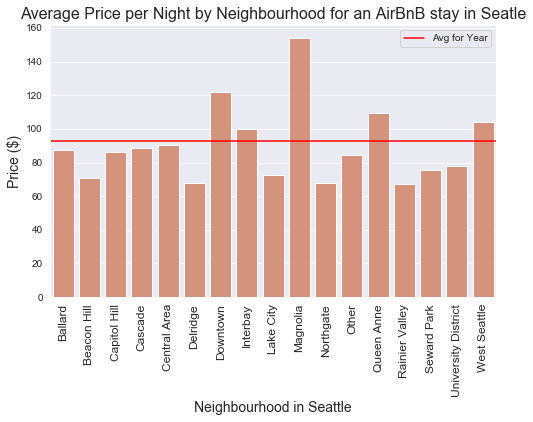

In [292]:
f, ax = plt.subplots(figsize=(8,5))
sns.set_style("darkgrid")
sns.barplot(x="neighbourhood",y="price",data=hood_avg_price_per_month,color="coral", saturation=.5,)
plt.title("Average Price per Night by Neighbourhood for an AirBnB stay in Seatle",fontsize=16)
plt.xlabel("Neighbourhood in Seattle",fontsize=14)
plt.ylabel("Price ($)",fontsize=14)
plt.axhline(calendar['price'].mean(),color='r',label='Avg for Year')
ax.set_xticklabels(hood_avg_price_per_month['neighbourhood'], rotation = 90,fontsize=12)
plt.legend();

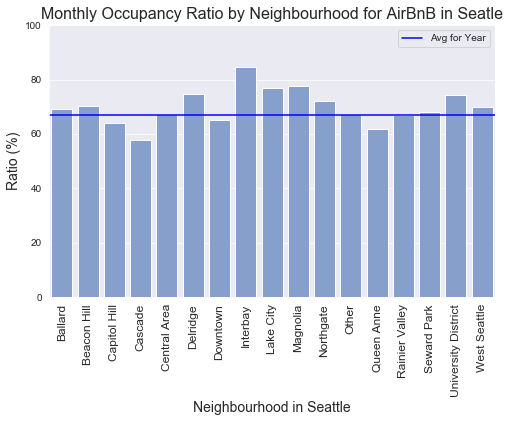

In [293]:
f, ax = plt.subplots(figsize=(8,5))
sns.set_style("darkgrid")
sns.barplot(x="neighbourhood",y="available",data=hood_occ,color="cornflowerblue", saturation=.5,)
plt.title("Monthly Occupancy Ratio by Neighbourhood for AirBnB in Seatle",fontsize=16)
plt.xlabel("Neighbourhood in Seattle",fontsize=14)
plt.ylabel("Ratio (%)",fontsize=14)
plt.ylim(0,100)
plt.axhline(calendar['available'].mean()*100,color='b',label='Avg for Year')
ax.set_xticklabels(hood_avg_price_per_month['neighbourhood'], rotation = 90,fontsize=12)
ax.legend();

In [2]:
sns.factorplot(x='date',y="price",data=hood_price_month)

NameError: name 'sns' is not defined